<a href="https://colab.research.google.com/github/caballeroarturo/B2-Analisis-de-Datos-con-Python-2020/blob/master/Sesion-06/Ejemplo-04/scatterplots_con_variables_condicionantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejemplo 4: Scatterplots con variables condicionantes

### 1. Objetivos:
    - Aprender a generar e interpretar scatterplots con variables condicionantes

---
    
### 2. Desarrollo:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
path1 = "https://raw.githubusercontent.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020/master/"
df = pd.read_csv(path1 + 'Datasets/athlete_olympic_events-clean.csv', index_col=0)

df.head(n=15)

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",None
5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,None
5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",None
6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,None


Por ejemplo, digamos que queremos visualizar las diferencias de peso y altura que hay entre los atletas que juegan basketball, volleyball, football y beisball:

In [3]:
df_grouped = df.groupby('name')[['height', 'weight', 'sport']].max()

In [7]:
df_grouped.head()

,height,weight,sport
name,,,
Th Anh,165.0,58.0,Fencing
Th Ngn Thng,147.0,47.0,Gymnastics
Tin Tun,173.0,63.0,Boxing
A Dijiang,180.0,80.0,Basketball
A Lamusi,170.0,60.0,Judo


In [19]:
df_ball = df_grouped[df_grouped['sport'].isin(['Basketball', 'Volleyball', 'Football', 'Baseball'])]

In [20]:
df_ball.head()

,height,weight,sport
name,,,
A Dijiang,180.0,80.0,Basketball
Aafke Hament,181.0,64.0,Volleyball
Aarn Galindo Rubio,182.0,80.0,Football
Aaron Duane Olson,195.0,90.0,Basketball
Aaron James Ramsey,178.0,70.0,Football


In [21]:
fig = plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

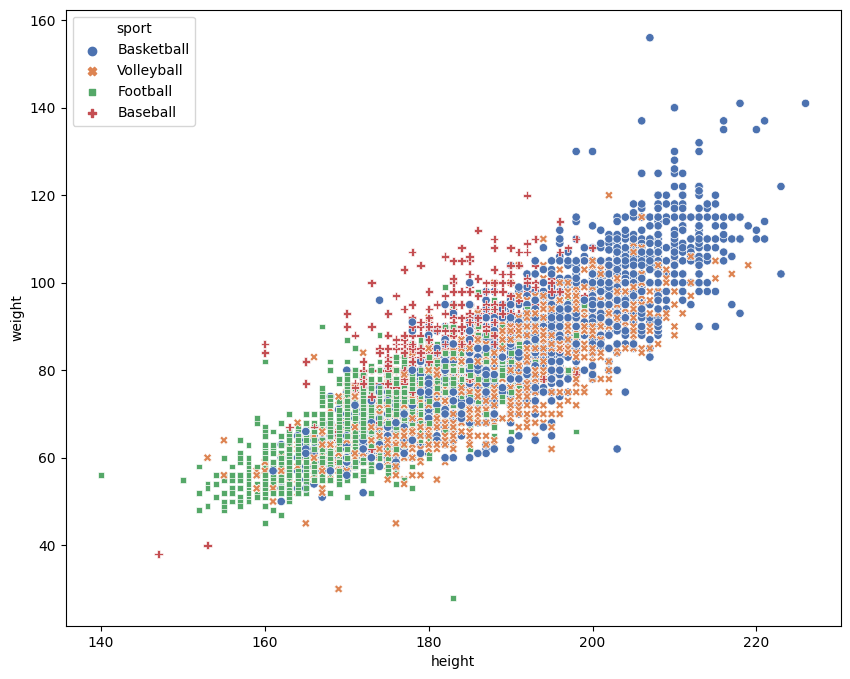

In [23]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()
sns.scatterplot(x=df_ball['height'], y=df_ball['weight'], hue=df_ball['sport'], style=df_ball['sport'], ax=ax, palette = "deep");

Utilizando este scatterplot por categorías ya podemos darnos una idea de las diferencias. Pero hay cierta confusión en la parte central de la gráfica donde están concentrados todos los deportes. Es difícil diferenciar los puntos cuando hay aglomeraciones tan grandes. Podemos entonces generar un scatterplot con variables condicionantes para ayudarnos:

In [24]:
basket = df_ball[df_ball['sport'] == 'Basketball']
volley = df_ball[df_ball['sport'] == 'Volleyball']
foot = df_ball[df_ball['sport'] == 'Football']
base = df_ball[df_ball['sport'] == 'Baseball']

In [25]:
basket.head()

,height,weight,sport
name,,,
A Dijiang,180.0,80.0,Basketball
Aaron Duane Olson,195.0,90.0,Basketball
Abby Bishop,189.0,85.0,Basketball
Abdel Aziz Boukar Boukar Moussa,204.0,97.0,Basketball
Abdel Hadi Ahmed El-Gazzar,194.0,80.0,Basketball


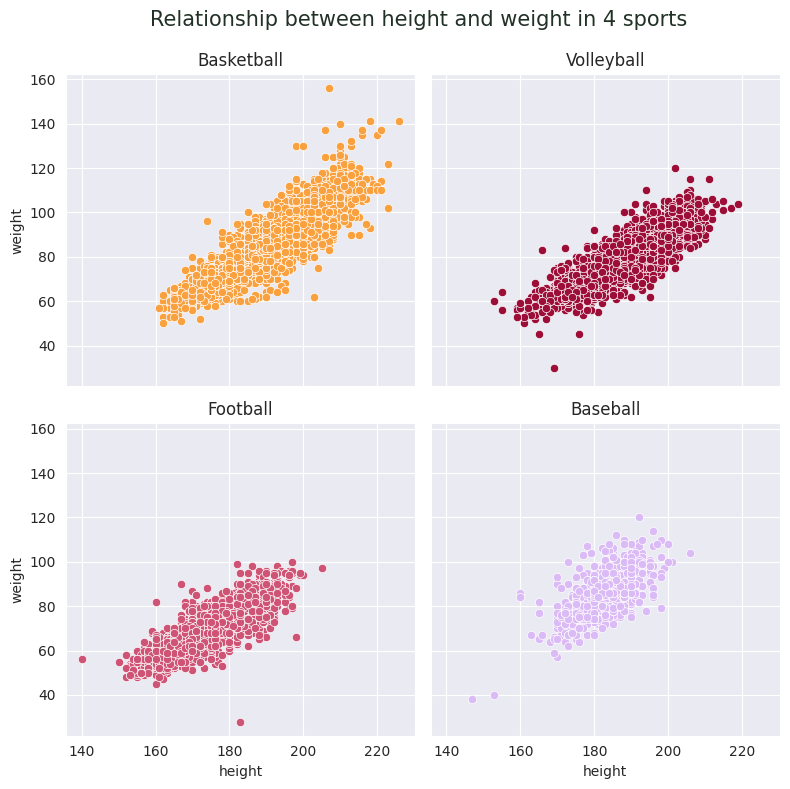

In [32]:
sns.set_style("darkgrid")
palette = ["#223127","#9c0d38","#ce5374","#dbbbf5","#F9A03F"]

# aquí se hace la magia
fig = plt.figure(figsize=(8, 8))
axes = fig.subplots(2, 2, sharex=True, sharey=True)
axes[0, 0].set_title('Basketball')
axes[0, 1].set_title('Volleyball')
axes[1, 0].set_title('Football')
axes[1, 1].set_title('Baseball')
fig.suptitle('Relationship between height and weight in 4 sports', fontsize=15, c=palette[0], x=0.53)

#--- Gráficas
sns.scatterplot(x=basket['height'], y=basket['weight'], ax=axes[0, 0], color=palette[4])
sns.scatterplot(x=volley['height'], y=volley['weight'], ax=axes[0, 1], color=palette[1])
sns.scatterplot(x=foot['height'], y=foot['weight'], ax=axes[1, 0], color=palette[2])
sns.scatterplot(x=base['height'], y=base['weight'], ax=axes[1, 1], color=palette[3]);

#meter las gráficas
plt.tight_layout()
plt.subplots_adjust(top=0.9)

¡Genial¡ Ahora sí tenemos mucha más claridad acerca de cómo están repartidos los atletas que juegan estos 4 deportes. Podemos ver que cada deporte tiene ciertas tendencias muy claras. Aunque hay mucha superposición, hay diferencias claras.